Link to the dataset: https://data.london.gov.uk/dataset/number-international-visitors-london

My path: /Users/Kunj/Desktop/College Imp Data/international-visitors-london-raw.csv

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Loading the dataset
path = input("Please enter the path to the CSV file: ")
data = pd.read_csv(path, encoding='latin1') #

#Checking the first few rows to get basic info
print(data.head())
print(data.info())

Please enter the path to the CSV file: /Users/Kunj/Desktop/College Imp Data/international-visitors-london-raw.csv
   year        quarter   market     dur_stay mode        purpose     area  \
0  2002  January-March  Belgium  1-3  nights  Air        Holiday   LONDON   
1  2002  January-March  Belgium  1-3  nights  Air       Business   LONDON   
2  2002  January-March  Belgium  1-3  nights  Air            VFR   LONDON   
3  2002  January-March  Belgium  1-3  nights  Air  Miscellaneous   LONDON   
4  2002  January-March  Belgium  1-3  nights  Sea       Business   LONDON   

   Visits (000s)  Spend (£m)  Nights (000s)  sample  
0       3.572186    0.969138       6.954456       5  
1       9.284226    2.399577      12.604959      19  
2       0.877182    0.089833       2.153128       3  
3       0.163874    0.010160       0.163874       1  
4       1.648670    0.016789       1.650300       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 11 

In [72]:
print(data.columns)

Index(['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area',
       'Visits (000s)', 'Spend (£m)', 'Nights (000s)', 'sample'],
      dtype='object')


In [73]:
#Checking for missing values
print(data.isnull().sum())

#Dropping duplicates if any
data = data.drop_duplicates()

#Checking data types
print(data.dtypes)

year             0
quarter          0
market           0
dur_stay         0
mode             0
purpose          0
area             0
Visits (000s)    0
Spend (£m)       0
Nights (000s)    0
sample           0
dtype: int64
year              object
quarter           object
market            object
dur_stay          object
mode              object
purpose           object
area              object
Visits (000s)    float64
Spend (£m)       float64
Nights (000s)    float64
sample             int64
dtype: object


In [74]:
#Getting summary statistics
print(data.describe())

       Visits (000s)    Spend (£m)  Nights (000s)        sample
count   61462.000000  61462.000000   61462.000000  61462.000000
mean        4.927651      3.086634      30.300852      6.099021
std        10.061362      7.243874      61.898302     13.335820
min         0.000103      0.000000       0.000309      1.000000
25%         0.822888      0.321693       3.901581      1.000000
50%         1.797305      1.047351      10.676935      2.000000
75%         4.416618      3.007542      29.483044      5.000000
max       187.487282    373.232590    2492.178513    299.000000


This graph explores the distribution of international visitors to London based on their nationality. By analyzing the total number of visits from different markets, we aim to identify which countries or regions contribute the most to London's tourism sector.

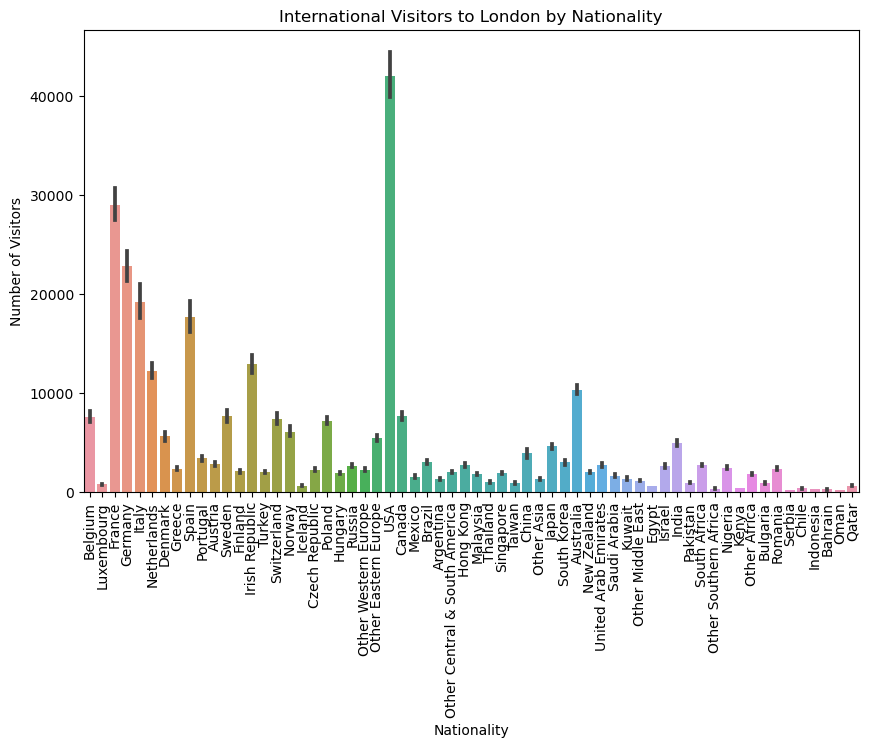

In [75]:
#Hypothesis 1
#Plotting visitor numbers by nationality
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='market', y='Visits (000s)', estimator=sum)
plt.xticks(rotation=90)
plt.title('International Visitors to London by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Visitors')
plt.show()

My hypothesis in the project proposal "The majority of international visitors to London come from Europe, with a significant decrease in visitors from other continents during off-peak seasons" is wrong, since it is clear from the bar chart that the maximum number of international visitors come from USA.

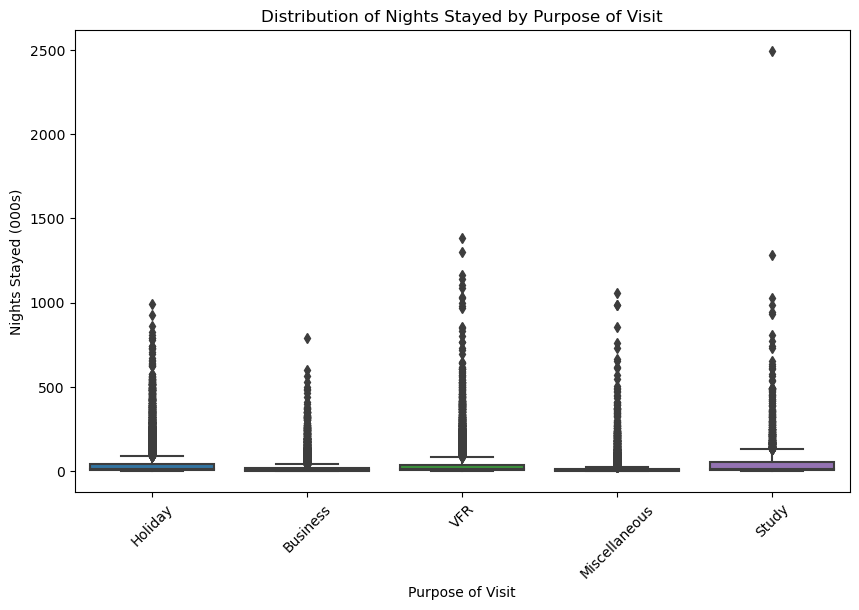

In [76]:
#Boxplot for nights by purpose
plt.figure(figsize=(10, 6))
sns.boxplot(x='purpose', y='Nights (000s)', data=data)
plt.title('Distribution of Nights Stayed by Purpose of Visit')
plt.xlabel('Purpose of Visit')
plt.ylabel('Nights Stayed (000s)')
plt.xticks(rotation=45)
plt.show()

This boxplot visualizes the variation in the number of nights stayed in London based on the purpose of the visit (e.g., leisure, business). The analysis highlights patterns in stay duration for different purposes, offering insights into how visitors allocate their time in London.


Correlation Matrix:
               Visits (000s)  Spend (£m)  Nights (000s)    sample
Visits (000s)       1.000000    0.681430       0.570558  0.830621
Spend (£m)          0.681430    1.000000       0.598601  0.614725
Nights (000s)       0.570558    0.598601       1.000000  0.481264
sample              0.830621    0.614725       0.481264  1.000000


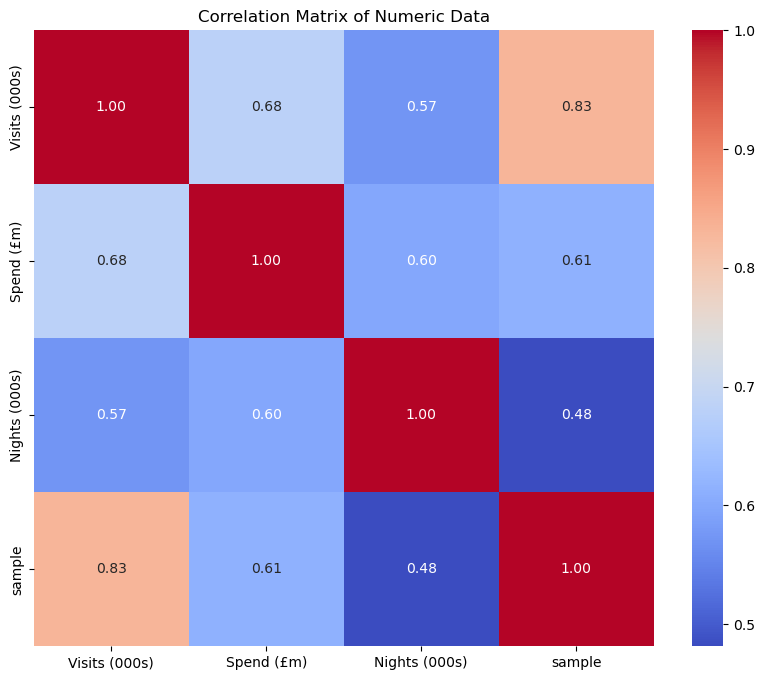

In [77]:
numeric_data = data.select_dtypes(include='number')

#Checking if there are numeric columns
if not numeric_data.empty:
    #Computing the correlation matrix
    correlation_matrix = numeric_data.corr()
    
    #Ensuring all values are within valid range
    if (correlation_matrix.values <= 1).all() and (correlation_matrix.values >= -1).all():
        print("\nCorrelation Matrix:")
        print(correlation_matrix)
        
        #Plotting the correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix of Numeric Data')
        plt.show()
    else:
        print("\nInvalid correlation values detected. Please review the input data.")
else:
    print("\nNo numeric data available for correlation.")

This analysis computes the correlation matrix for all numeric columns in the dataset.
The heatmap helps uncover patterns such as whether the number of visits correlates with the duration of stay or other factors.

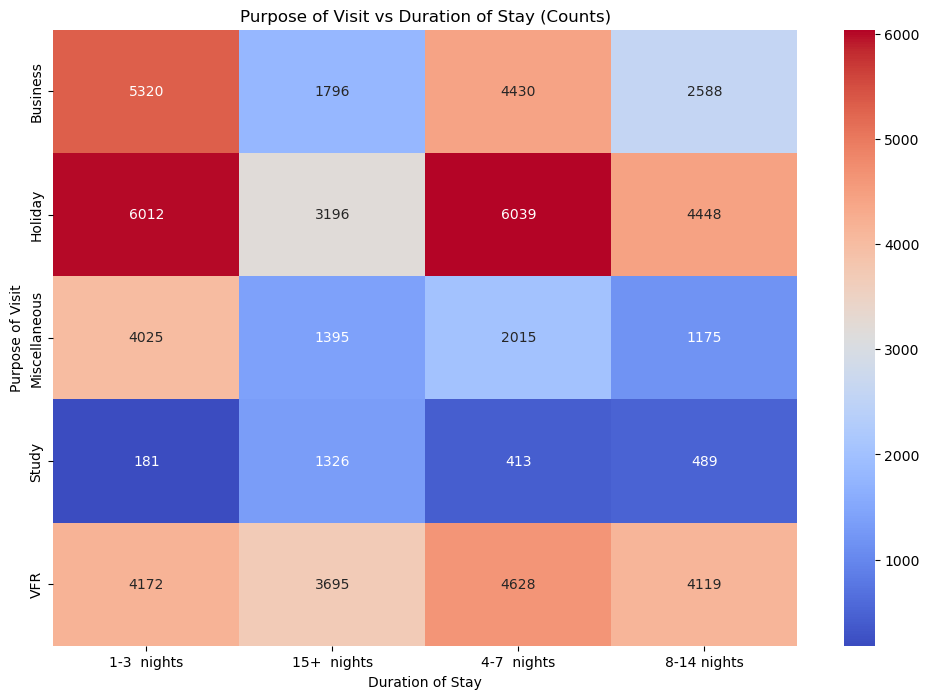

In [78]:
#Checking if 'purpose' and 'dur_stay' exist in the dataset
if 'purpose' in data.columns and 'dur_stay' in data.columns:
    #Creating a contingency table
    contingency_table = pd.crosstab(data['purpose'], data['dur_stay'])

    #Visualizing contingency table as a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
    plt.title('Purpose of Visit vs Duration of Stay (Counts)')
    plt.xlabel('Duration of Stay')
    plt.ylabel('Purpose of Visit')
    plt.show()
else:
    print("\n'purpose' and/or 'dur_stay' columns are not present in the dataset.")

This heatmap shows the contingency table for the number of visitors categorized by the purpose of their visit and their duration of stay. The visualization helps identify common patterns, such as which purposes are associated with longer or shorter stays. This information can aid in understanding visitor behavior and preferences.

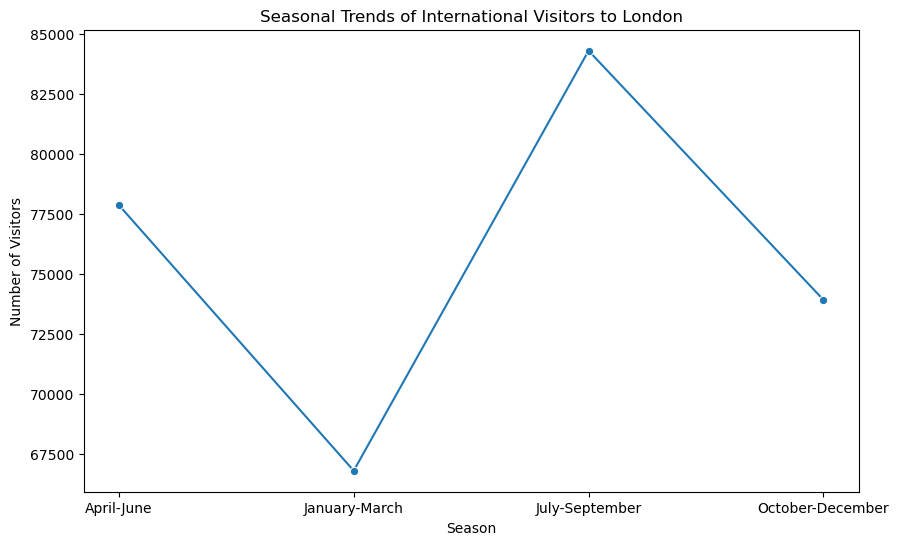

In [79]:
#Grouping data by season and calculate the average number of visitors
seasonal_data = data.groupby('quarter')['Visits (000s)'].sum().reset_index()

#Plotting seasonal trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_data, x='quarter', y='Visits (000s)', marker='o')
plt.title('Seasonal Trends of International Visitors to London')
plt.xlabel('Season')
plt.ylabel('Number of Visitors')
plt.show()

This line graph illustrates the seasonal trends in visitor numbers to London, aggregated by quarter. By observing these trends, we can identify peak and off-peak tourism periods, providing insights into how tourism demand fluctuates throughout the year.

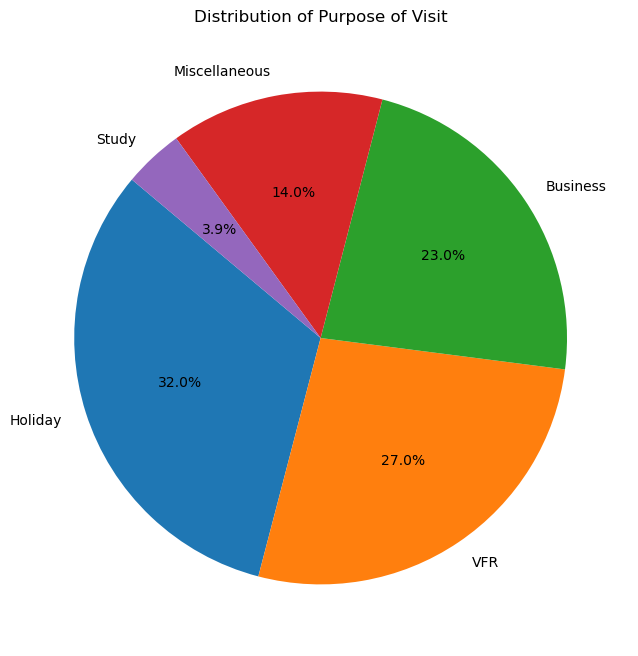

In [80]:
#Plotting pie chart for purpose of visit distribution
purpose_counts = data['purpose'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purpose of Visit')
plt.show()

This pie chart represents the distribution of visitors based on their purpose of visit, such as leisure, business, or other categories. Understanding the proportions of different visit purposes helps identify the primary motivations for international tourism in London.